In [1]:
import h5py
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, log_loss
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

from scipy.stats import randint, poisson, uniform

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')


In [2]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]
imp_var = ['p_sigmad0', 'p_Rhad', 'p_Rphi', 'p_Reta', 'p_ethad', 'p_ambiguityType', 'p_deltaPhiRescaled2', 'p_deltaEta1']

In [4]:
X = train[imp_var]
y = train['Truth']
test_data = test[imp_var]

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of X: (162500, 8)
Shape of y: (162500,)


In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


c:\Users\andr6\anaconda3\envs\appml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
#evallist = [(dtest, 'eval'), (dtrain, 'train')]
#num_round = 10
#bst = xgb.train(param, dtrain, num_round, evallist)
print(np.shape(X))
print(np.shape(y))

(162500, 8)
(162500,)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=7)



In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

scaler_s = StandardScaler()
scaler_r = RobustScaler()
scaler_q = QuantileTransformer()
# transform data
X_train_s = scaler_s.fit_transform(X_train)
X_train_r = scaler_r.fit_transform(X_train)
X_train_q = scaler_q.fit_transform(X_train)
test_data_q = scaler_q.fit_transform(test_data)

In [9]:
#X_20_s = X_train_s[imp_var]
#X_20_r = X_train_r[imp_var]
#X_20_q = X_train_q[imp_var]

In [10]:
#kfold = KFold(n_splits=10, shuffle=True)
#kf_cv_scores = cross_val_score(model, X, y, cv=kfold )
#print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [11]:
# select a random sub-sample of the dataset
#n = 10000
#idxs = np.arange(df.shape[0])
#idxs_rand = np.random.choice(idxs, size=n)
#df_cut = df.iloc[idxs_rand] # dataframe
#X = df.iloc[idxs_rand].values # array
#
#flux_cols = list(df.columns[4:]) # flux column names
#flux_idxs = np.argwhere(np.isin(df.columns, flux_cols)).flatten() # flux column indices

In [12]:
#permutation loss score for hyper parameter optimize

In [13]:
#shap.plots.bar(shap_values, max_display=50)


In [14]:
# running t-SNE
#tsne_s = TSNE(perplexity=20, n_iter=1000,n_iter_without_progress=100, init='random', verbose=2, 
#            method='barnes_hut', learning_rate='auto', random_state=42)
#y_s = tsne_s.fit_transform(X_train_s)

In [15]:
#tsne_r = TSNE(perplexity=20, n_iter=1000,n_iter_without_progress=100, init='random', verbose=2, 
#            method='barnes_hut', learning_rate='auto', random_state=42)
#y_r = tsne_r.fit_transform(X_train_r)

In [16]:
tsne_q60 = TSNE(perplexity=60, n_iter=1000,n_iter_without_progress=100, init='random', verbose=2, 
            method='barnes_hut', learning_rate='auto', random_state=42)

tsne_q50 = TSNE(perplexity=50, n_iter=1000,n_iter_without_progress=100, init='random', verbose=2, 
            method='barnes_hut', learning_rate='auto', random_state=42)

test_q60 = tsne_q60.fit_transform(test_data_q)
test_q50 = tsne_q50.fit_transform(test_data_q)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 160651 samples in 0.246s...
[t-SNE] Computed neighbors for 160651 samples in 60.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 160651
[t-SNE] Computed conditional probabilities for sample 2000 / 160651
[t-SNE] Computed conditional probabilities for sample 3000 / 160651
[t-SNE] Computed conditional probabilities for sample 4000 / 160651
[t-SNE] Computed conditional probabilities for sample 5000 / 160651
[t-SNE] Computed conditional probabilities for sample 6000 / 160651
[t-SNE] Computed conditional probabilities for sample 7000 / 160651
[t-SNE] Computed conditional probabilities for sample 8000 / 160651
[t-SNE] Computed conditional probabilities for sample 9000 / 160651
[t-SNE] Computed conditional probabilities for sample 10000 / 160651
[t-SNE] Computed conditional probabilities for sample 11000 / 160651
[t-SNE] Computed conditional probabilities for sample 12000 / 160651
[t-SNE] Computed conditional proba

In [17]:
#fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
#ax.set_xlabel('Component 1')
#ax.set_ylabel('Component 2')
##is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)
#
#ax.scatter(y_s[:,0],y_s[:,1],s=1)
#
#
#plt.show()

In [18]:
#fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
#ax.set_xlabel('Component 1')
#ax.set_ylabel('Component 2')
##is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)
#
#ax.scatter(y_r[:,0],y_r[:,1],s=1)
#
#
#plt.show()

In [25]:
clustering_50 = DBSCAN(eps=3.2, min_samples=100).fit(test_q50)


In [26]:
pred_50 = clustering_50.labels_
print(pred_50.shape)
print(pred_50[0:20])

(160651,)
[0 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 3 0 0 0]


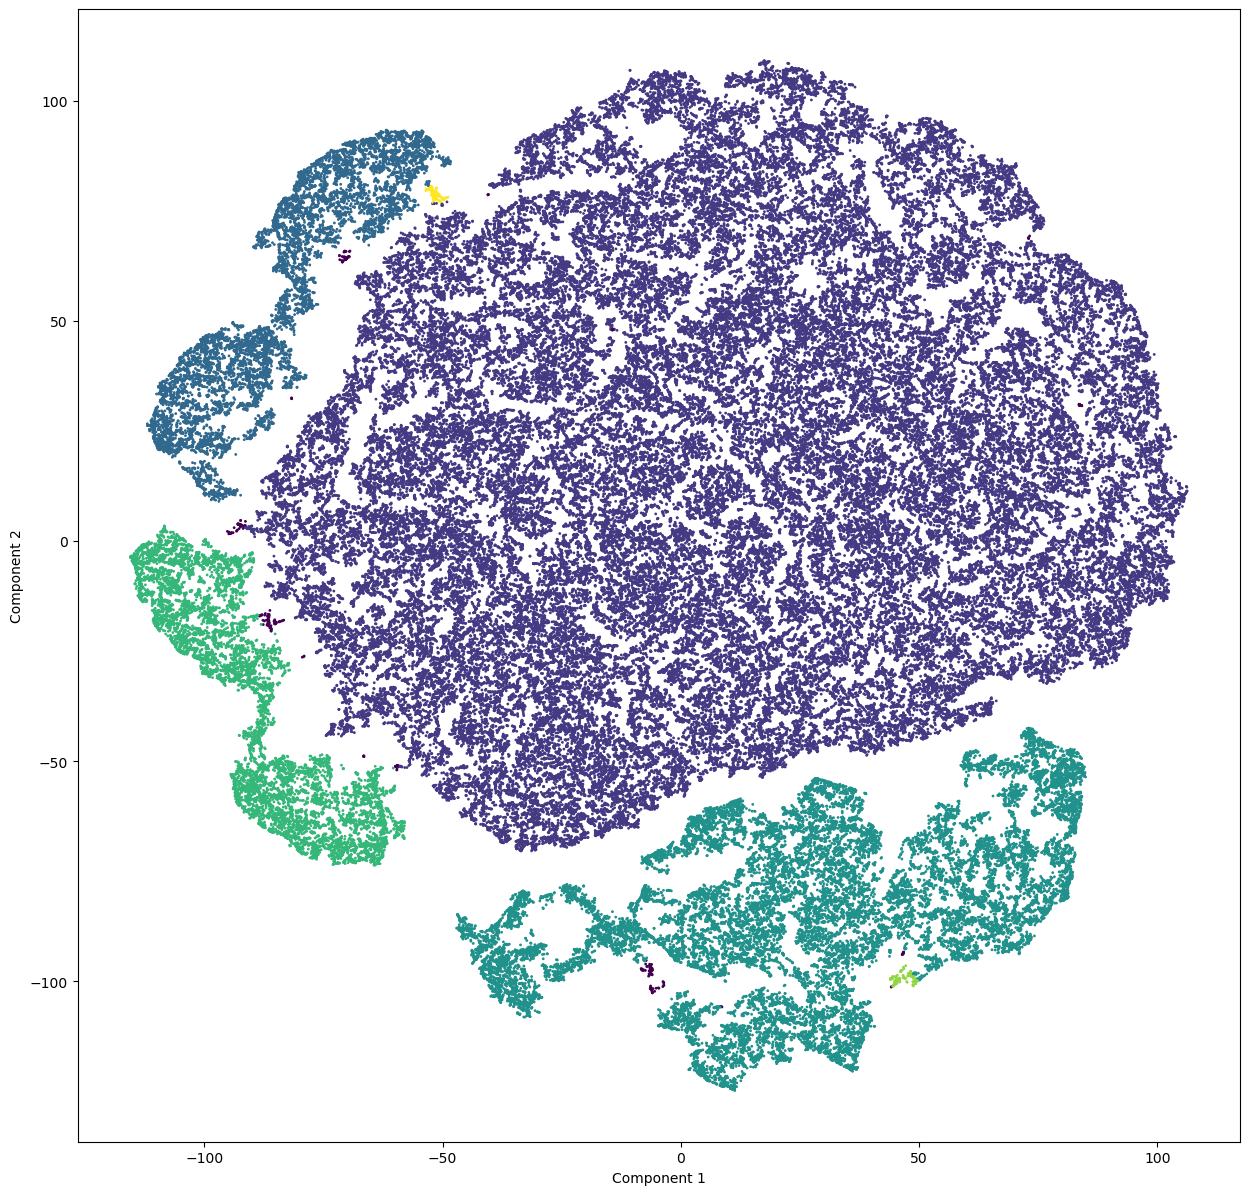

In [27]:
fig, ax = plt.subplots(1, figsize=(15, 15), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
#is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(test_q50[:,0],test_q50[:,1],s=1,c=pred_50)


plt.show()

In [28]:
clustering_60 = DBSCAN(eps=3.2, min_samples=100).fit(test_q60)

In [29]:
pred_60 = clustering_60.labels_
print(pred_60.shape)
print(pred_60[0:20])

(160651,)
[0 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 3 0 0 0]


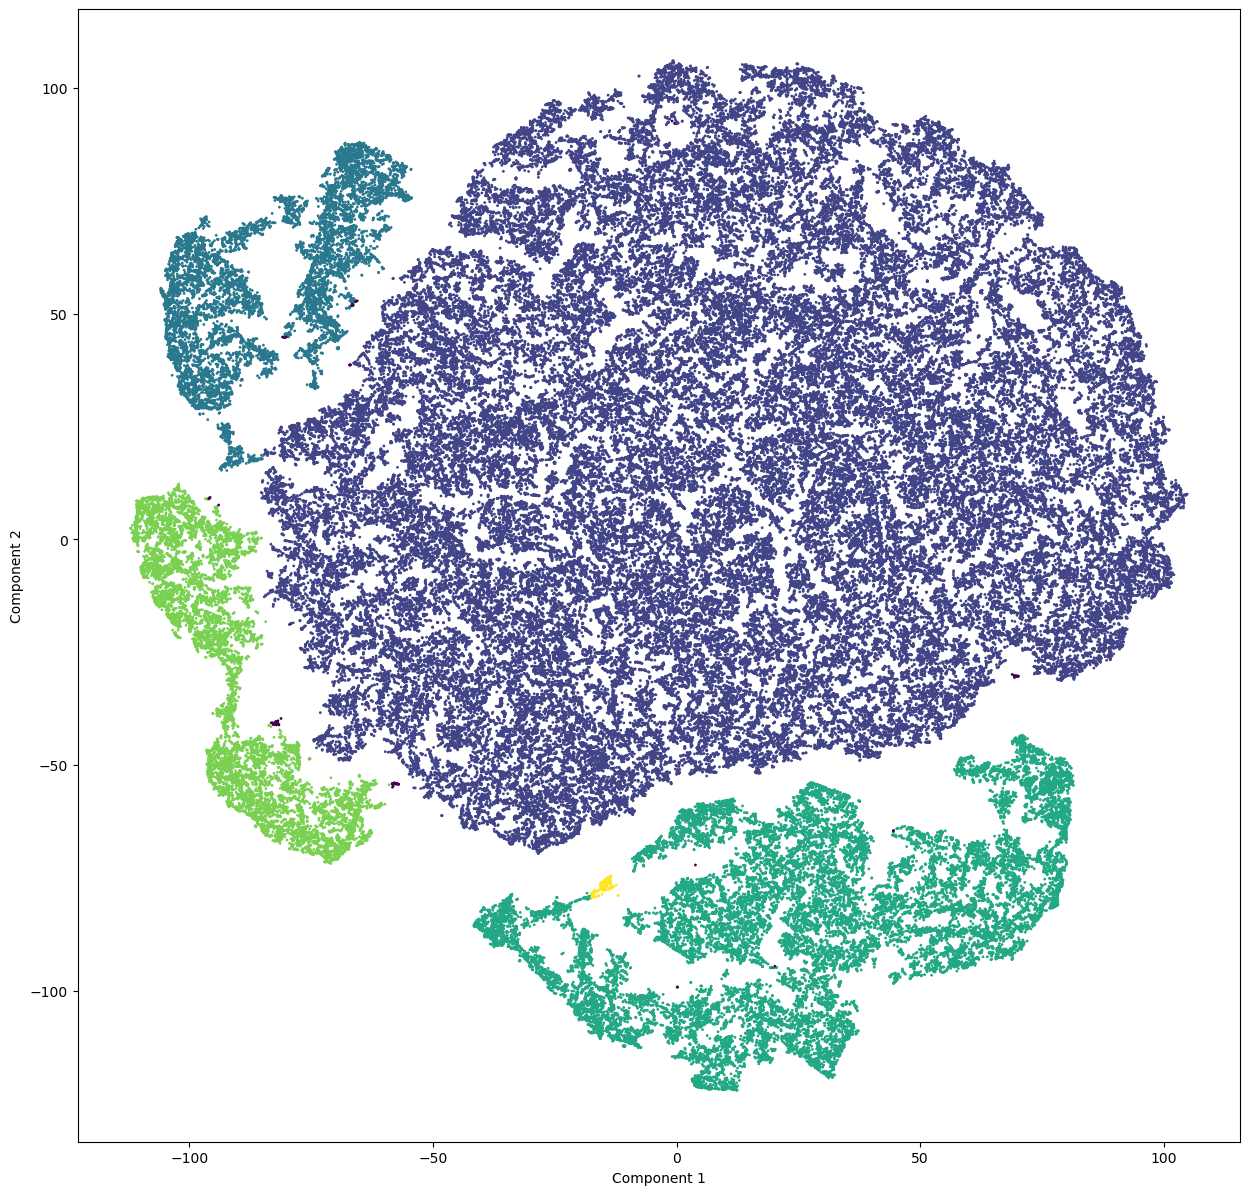

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 15), dpi=100)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
#is_sf = np.isin(df_cut.loc[:, 'is_star_forming'], 1)

ax.scatter(test_q60[:,0],test_q60[:,1],s=1,c=pred_60)


plt.show()

In [31]:
with open('Clustering_AndreasJørgensen_TsneDBscan.txt','w') as f:
    for i in range(len(pred_60)):
        f.write(str(i))
        f.write(',')
        f.write(str(pred_60[i]))
        f.write('\n')

In [32]:
with open('Clustering_AndreasJørgensen_TsneDBscan_Variablelist.txt','w') as f:
    for i in range(len(imp_var)):
        f.write(str(imp_var[i]))
        f.write('\n')